In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import networkx as nx
import pickle

import sys
sys.path.insert(1, '../')
from utils import *

In [2]:
plt.rcParams.update({'font.size': 13})

## Functions:

In [3]:
def load_C_mean(filename):
    with open(filename, 'r') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            C = np.array([float(i) for i in row])
    return C

In [4]:
# cosine similarity between vectors
def similarity(v1,v2):
    
    return np.sum(v1*v2) / (np.sqrt((np.sum(v1*v1))*np.sum(v2*v2)))

In [5]:
#dataset = 'hospital'
#dataset = 'high_school'
dataset = 'conference'
#dataset = 'workplace'

In [6]:
weighted = True

In [7]:
edgelist_name = '../data/pairwise/' + dataset + '_strength_edgelist_pairwise_sorted_norm.pkl'
with open(edgelist_name, 'rb') as f:
    edgelist = pickle.load(f)

nodes_list = np.unique(list(edgelist.keys()))

In [8]:
nb_nodes = len(nodes_list)
seed_size = int(round(nb_nodes/10))
seed_size

40

# Comparison matrices

## Varying $\beta_{|}$

In [9]:
mu = 0.1

Load all simplicial results

In [10]:
if dataset == 'hospital':
    beta_betaT_range = [(0.6,0.8),
                        (0.2,0.8),
                        (0.4,7.5),
                        (0.3,5),
                        (0.15,5),
                        (0.3,10),
                        (0.1,10),
                        (0.06,10),
                        (0.05,15),
                        (0.05,19)]
#elif dataset == 'high_school':
    
elif dataset == 'conference':
    beta_betaT_range = [(1,12),
                        (0.9,12),
                        (0.8,12),
                        (0.7,12),
                        (0.6,12),
                        (0.5,12),
                        (0.4,12),
                        (0.3,12)] 
elif dataset == 'workplace':
    beta_betaT_range = [(0.5,6),
                        (0.5,7),
                        (0.3,6),
                        (0.4,7.3),
                        (0.2,7),
                        (0.2,7.3)]

In [11]:
C_list_simplicial = []
for (beta,betaT) in beta_betaT_range:
    filenameL = "../Simplicial_model/code/results/inf_treeSIR/CL_mean_weighted_%s_beta_%.3f_betaT_%.3f_mu_%.2f_init_1.csv"%(dataset,beta,betaT,mu)
    filenameT = "../Simplicial_model/code/results/inf_treeSIR/CT_mean_weighted_%s_beta_%.3f_betaT_%.3f_mu_%.2f_init_1.csv"%(dataset,beta,betaT,mu)
    CL = load_C_mean(filenameL)
    CT = load_C_mean(filenameT)
    C_list_simplicial.append(CL+CT)

In [12]:
len(C_list_simplicial)

8

Load all threshold results

In [13]:
thresholds = [0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20, 0.22]

In [14]:
C_list_thresh = []
for theta in thresholds:
    filename = "../Threshold_model/code/results/inf_treeSIR/C_mean_weighted_%s_th_%.2f_mu_%.3f.csv"%(dataset,theta,mu)
    C = load_C_mean(filename)
    C_list_thresh.append(C)

In [15]:
len(C_list_thresh)

10

Compute similarity and put in matrix sim$\\$ (each row is a different $\theta$, each column a different $\beta_|$)

In [16]:
sim = np.full((len(thresholds),len(beta_betaT_range)),0.0)
for i in range(len(thresholds)):
    for j in range(len(beta_betaT_range)):            
        sim[i,j] = similarity(C_list_thresh[i],C_list_simplicial[j])
        #print('riga',i,'col',j,'theta',thresholds[i],'beta',beta_range[j])

In [17]:
len(sim), len(sim[0])

(10, 8)

0.4629678943383235 0.7065716162622984


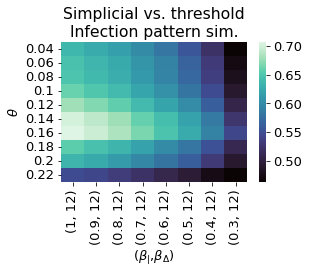

In [18]:
plot_sim_different_axes(sim, 
                        beta_betaT_range, 
                        thresholds, 
                        r'($\beta_{|}$,$\beta_{\Delta}$)', 
                        r'$\theta$',
                        'Simplicial vs. threshold\n' +'Infection pattern sim.',
                        'figs/sim_simplicial_threshold_%s_mu_%.3f.pdf'%(dataset,mu),
                        save=True)